# Assignment 1: k-nearest neighbors (Programming) 

Only use the already imported libraries `numpy` and `matplotlib.pyplot` for the assignment. Do not import any other library. 

==> *Write*
* *names* : M.Mehroz Khan, 
* *matr. nr.* st180421, 
* *study program* :Infotech
* *B.Sc./M.Sc.*: MSc

*of all assignment group participants here.* (double klick here to edit)*

In [1]:
# Load required packages and dataset. Do not modify.
import matplotlib.pyplot as plt
import numpy as np

def load_breast_cancer_dataset():
    from sklearn import datasets
    breast_cancer = datasets.load_breast_cancer()
    X = breast_cancer.data
    y = breast_cancer.target
    return X, y
    
X, y = load_breast_cancer_dataset()


## Task 1: Visualization and Preprocessing

1) Explain the content of the dataset in few words. What are the input features? What is the classification target? Check out: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


==> *This is a classification task and our goal is to diagnose whether the given cell nuclei of breast is malignant or benign.The characteristics of cell nuclei are explained with 30 features like 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension' *


2) Compute and print the following statistics about the dataset:
  - Number of samples
  - Number of samples per class
  - Mean and standard deviation for each input feature


In [482]:
# Implement your solution here.
print("Number of Samples: ", len(y))


classes , count = np.unique(y, return_counts= True)
print(f"Number of samples per class: {list(zip(classes, count))[0]} , {list(zip(classes, count))[1]}") #the result is in this form (class, frequency)


print(f"\nMean and standard deviation for each input feature:\nMean\n{np.mean(X, axis=0)} \n\nStandard_Deviation\n{np.std(X, axis=0)} ")

Number of Samples:  569
Number of samples per class: (0, 212) , (1, 357)

Mean and standard deviation for each input feature:
Mean
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02] 

Standard_Deviation
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198

3) Visualize the variables *radius (mean)* and *texture (mean)* in a scatter plot (*radius (mean)* on the x-axis, *texture (mean)* on the y-axis). Color each point of the plot according to its class.

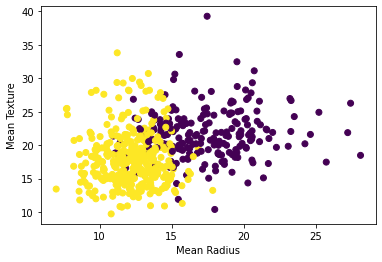

In [92]:
# Implement your solution here.
plt.scatter(x= X[:,0], y= X[:,1], c= y)

plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

4) Split the dataset randomly into training and test data. 70% of data should be used for training and 30% should be used for testing. Implement the function `train_test_split`. Do not modify the interface of the function.

In [483]:
def train_test_split(X, y):
    """
    Returns X_train, X_test, y_train, y_test, 
        where X_train and X_test are the input features of the training and test set,
        and y_train and y_test are the class labels of the training and test set.
    """
    np.random.seed(333)

    a = np.arange(len(y))
    np.random.shuffle(a)
    train_index = a[ : int(0.7*len(y))]
    test_index = a[int(0.7*len(y)): ]
    
    X_train = np.take(a= X, indices= train_index, axis= 0)
    X_test = np.take(a= X, indices= test_index, axis= 0)
    y_train = np.take(a= y, indices= train_index, axis= 0)
    y_test = np.take(a= y, indices= test_index, axis= 0)
    
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)

assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0]
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]
assert X_train.shape[1] == X_test.shape[1]

5) kNN uses a distance measure to identify close neighbors. If the input features are not of the same scale, the distance is not as meaningful, which can negatively impact classification performance. Perform min-max scaling (i.e. scale the values of the input features in such a way that their range is from 0 to 1) on the training and test data. Remember that you should only use information from the training data to perform the scaling on both data sets.

In [484]:
# Implement your solution here

X_train_min = np.min(a= X_train, axis= 0)
X_train_max = np.max(a= X_train, axis= 0)

X_train_scaled = (X_train - X_train_min) / (X_train_max - X_train_min)


## Task 2: k-nearest neighbors 
*Choose classes randomly if weights are equal for multiple classes*

**For B.Sc. Data Science:**  

Implement the kNN algorithm with uniform weighting and arbitrary `k`. Fill out the `predict` method of class `KNearestNeighbors`. 

Use Euclidean distance to determine the nearest neighbors.
You can ignore the optional parameter `weights`, which is provided as a field in the kNN class.

**For all students other than B.Sc. Data Science:**

Implement the kNN algorithm with uniform and distance-based weighting and arbitrary `k`.
Fill out the `predict` method of class `KNearestNeighbors`.

The parameter `weights` will either contain the string `uniform` or `distance`. 
- If the value is `uniform`, the classifier should use the Euclidean distance for determining nearest neighbors and uniform weighting. 
- If the value is a `distance`, the classifier should use the Euclidean distance for determining neares neighbors and perform distance-weighted classification.

In [485]:
class KNearestNeighbors(object):
    def __init__(self, k, weights='uniform'):
        self.k = k
        self.weights = weights
        
    def fit(self, X, y):
        """
        This functions saves the training data to be used during the prediction.
        """
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        Returns a vector of shape (n,) if X has shape (n,d), 
        where n is the number of samples and d is the number of features.
        """
        # Implement your solution here.
        
        dist = []                                          #distances b/w X_train and X_test data point
            
        for train_row in self.X:
            dist.append(euclidean_distance(train_row, X))
            
        srt_dist_arg = np.argsort(dist)                    #sorted argument distances
        nn = srt_dist_arg[: self.k]                        #top k nearest neighbors indices
        nn_labels = np.take(self.y, indices= nn)           #labels of top k nearest neighbours
            
        
        if self.weights == 'uniform':
            
            
            classes , count = np.unique(nn_labels, return_counts= True)       #different classes and their numbers
            predicted_class = np.take(classes,indices = np.argmax(count))     #class of X_test data point
            
            return predicted_class
            
        else:
            
            weights = 1 / np.array(nn)                                             #weights w.r.t distances
            m = [(i,sum(weights[nn_labels == i])) for i in np.unique(nn_labels)]   #classes and their corresponding sum of weights
            classes = np.array([i[0] for i in m])                                  #classes types as np.array
            weighted_score = np.array([i[1] for i in m])                           #weighted score as np.array
            predicted_class = np.take(classes,indices = np.argmax(weighted_score)) #predicted class
            
            
            return predicted_class

    
def euclidean_distance(x1, x2):
    """
    Given vectors x1 and x2 with shape (n,) returns distance between vectors as float.
    """
    
    return np.sqrt(np.sum((x1 - x2)*(x1 - x2)))

In [486]:
def precision(y_pred, y_true):
    # Implement your solution here.
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(y_pred)):
        if   (y_pred[i] == 0) & (y_true[i] == 0):
            tp += 1
        elif (y_pred[i] == 0) & (y_true[i] == 1):
            fp += 1
        elif (y_pred[i] == 1) & (y_true[i] == 1):
            tn += 1
        else:
            fn += 1
    
    
    precision = tp / (tp + fp)
    
    return precision

def recall(y_pred, y_true):
    # Implement your solution here.
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(y_pred)):
        if   (y_pred[i] == 0) & (y_true[i] == 0):
            tp += 1
        elif (y_pred[i] == 0) & (y_true[i] == 1):
            fp += 1
        elif (y_pred[i] == 1) & (y_true[i] == 1):
            tn += 1
        else:
            fn += 1
    
    recall = tp / (tp + fn)
    
    return recall

def f1score(y_pred, y_true):
    # Implement your solution here.
    
    prec = precision(y_pred, y_true)
    rec = recall(y_pred, y_true)
    f1 = (2 * prec * rec )/ (prec + rec)
    
    return f1

2) Evaluate the performance of kNN with uniform weighting on the Breast Cancer dataset for `k=1,5,9`. Train each of the `3` classifiers on the training data from Task 1. Perform the predictions on both the training and test data. Then compute precision, recall, and F1-score for each model and for both training and test data. Visualize the performance in a plot, what do you observe?

**For all students other than B.Sc. Data Science:** 

Also evaluate the kNN classifier with Euclidean distance-weighting. Compare the performance to uniform-weighting. How does the performance change compared to uniform weighting for each `k`?

In [487]:
# Implement your solution here.
a = KNearestNeighbors(1)
a.fit(X_train, y_train)

y_pred_1 = [a.predict(X= i) for i in X_test]
print(f'precision_1: {precision(y_pred_1, y_test)}\nrecall_1: {recall(y_pred_1, y_test)} \nf1-score_1: {f1score(y_pred_1, y_test)}')

a = KNearestNeighbors(5)
a.fit(X_train, y_train)

y_pred_5 = [a.predict(X= i) for i in X_test]
print(f'precision_5: {precision(y_pred_5, y_test)}\nrecall_5: {recall(y_pred_5, y_test)} \nf1-score_5: {f1score(y_pred_5, y_test)}')

a = KNearestNeighbors(9)
a.fit(X_train, y_train)

y_pred_9 = [a.predict(X= i) for i in X_test]
print(f'precision_9: {precision(y_pred_9, y_test)}\nrecall_9: {recall(y_pred_9, y_test)} \nf1-score_9: {f1score(y_pred_9, y_test)}')

precision_1: 0.9315068493150684
recall_1: 0.9714285714285714 
f1-score_1: 0.9510489510489512
precision_5: 0.9701492537313433
recall_5: 0.9285714285714286 
f1-score_5: 0.948905109489051
precision_9: 0.9696969696969697
recall_9: 0.9142857142857143 
f1-score_9: 0.9411764705882354


In [488]:
a = KNearestNeighbors(1, weights= 'distance')
a.fit(X_train, y_train)

y_pred_1 = [a.predict(X= i) for i in X_test]
print(f'precision_1: {precision(y_pred_1, y_test)}\nrecall_1: {recall(y_pred_1, y_test)} \nf1-score_1: {f1score(y_pred_1, y_test)}')

a = KNearestNeighbors(5, weights= 'distance')
a.fit(X_train, y_train)

y_pred_5 = [a.predict(X= i) for i in X_test]
print(f'precision_5: {precision(y_pred_5, y_test)}\nrecall_5: {recall(y_pred_5, y_test)} \nf1-score_5: {f1score(y_pred_5, y_test)}')

a = KNearestNeighbors(9, weights= 'distance')
a.fit(X_train, y_train)

y_pred_9 = [a.predict(X= i) for i in X_test]
print(f'precision_9: {precision(y_pred_9, y_test)}\nrecall_9: {recall(y_pred_9, y_test)} \nf1-score_9: {f1score(y_pred_9, y_test)}')

precision_1: 0.9315068493150684
recall_1: 0.9714285714285714 
f1-score_1: 0.9510489510489512


<ipython-input-485-321a9cce88ab>:40: RuntimeWarning: divide by zero encountered in true_divide
  weights = 1 / np.array(nn)                                             #weights w.r.t distances


precision_5: 0.9701492537313433
recall_5: 0.9285714285714286 
f1-score_5: 0.948905109489051
precision_9: 0.9565217391304348
recall_9: 0.9428571428571428 
f1-score_9: 0.9496402877697843


==> *Write your observations here and report your results.* (double klick here to edit)
As we increase k, f1 score improves in both cases but it is slightly better in case of weighted distance.
As we increase k, precision improves in both cases but it is little better in case of weighted distance. 
As we increase k, recall core improves in uniform weight cases but it decreased in case of weighted distance. 